In [70]:
import pickle
import random
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import classification_report

In [71]:
dataset_sequential = pickle.load(open("sequentialMNIST.pickle", "rb"))

In [72]:
dataset_permuted = pickle.load(open("permutedMNIST.pickle", "rb"))

In [73]:
sequential_img, sequential_lable = dataset_sequential["train"]["images"], dataset_sequential["train"]["labels"]
permuted_img, permuted_lable = dataset_permuted["train"]["images"], dataset_permuted["train"]["labels"]

In [74]:
def split(train_x, train_y):
    train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2, random_state=42)
    return train_x, val_x, train_y, val_y

In [75]:
seq_train_x, seq_val_x, seq_train_y, seq_val_y = split(sequential_img, sequential_lable)
perm_train_x, perm_val_x, perm_train_y, perm_val_y = split(permuted_img, permuted_lable)

In [76]:
seq_train_y = tf.keras.utils.to_categorical(seq_train_y, num_classes=10)
seq_val_y = tf.keras.utils.to_categorical(seq_val_y, num_classes=10)

In [77]:
perm_train_y = tf.keras.utils.to_categorical(perm_train_y, num_classes=10)
perm_val_y = tf.keras.utils.to_categorical(perm_val_y, num_classes=10)

In [78]:
seq_train_x.shape, seq_val_x.shape, seq_train_y.shape, seq_val_y.shape

((48000, 784, 1), (12000, 784, 1), (48000, 10), (12000, 10))

In [79]:
perm_train_x.shape, perm_val_x.shape, perm_train_y.shape, perm_val_y.shape

((48000, 784, 1), (12000, 784, 1), (48000, 10), (12000, 10))

In [80]:
random_int = [random.randint(0, len(sequential_img)) for _ in range(3)]

In [81]:
fig, axis = plt.subplots(2, 3, figsize=(10, 10))
for i in range(3):
    axis[0, i].imshow(sequential_img[random_int[i]].reshape(28, 28), cmap='gray')
    axis[0, i].set_title(sequential_lable[random_int[i]])
    axis[0, i].axis('off')

    axis[1, i].imshow(permuted_img[random_int[i]].reshape(28, 28), cmap='gray')
    axis[1, i].set_title(permuted_lable[random_int[i]])
    axis[1, i].axis('off')

plt.show()

In [82]:
model = tf.keras.Sequential([
    tf.keras.layers.Reshape(target_shape=(28, 28), input_shape=(784,)),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LSTM(units=128, return_sequences=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LSTM(units=64, return_sequences=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

In [39]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
history = model.fit(seq_train_x, seq_train_y, epochs=10, validation_data=(seq_val_x, seq_val_y))

Epoch 1/10
1500/1500 [==============================] - 137s 89ms/step - loss: 0.2347 - accuracy: 0.9270 - val_loss: 0.1077 - val_accuracy: 0.9688
Epoch 2/10
1500/1500 [==============================] - 107s 71ms/step - loss: 0.0786 - accuracy: 0.9766 - val_loss: 0.0722 - val_accuracy: 0.9788
Epoch 3/10
1500/1500 [==============================] - 110s 73ms/step - loss: 0.0560 - accuracy: 0.9835 - val_loss: 0.0592 - val_accuracy: 0.9851
Epoch 4/10
1500/1500 [==============================] - 107s 72ms/step - loss: 0.0468 - accuracy: 0.9853 - val_loss: 0.0514 - val_accuracy: 0.9857
Epoch 5/10
1500/1500 [==============================] - 105s 70ms/step - loss: 0.0378 - accuracy: 0.9888 - val_loss: 0.0515 - val_accuracy: 0.9857
Epoch 6/10
1500/1500 [==============================] - 105s 70ms/step - loss: 0.0336 - accuracy: 0.9899 - val_loss: 0.0568 - val_accuracy: 0.9856
Epoch 7/10
1500/1500 [==============================] - 104s 70ms/step - loss: 0.0286 - accuracy: 0.9911 - val_loss: 0

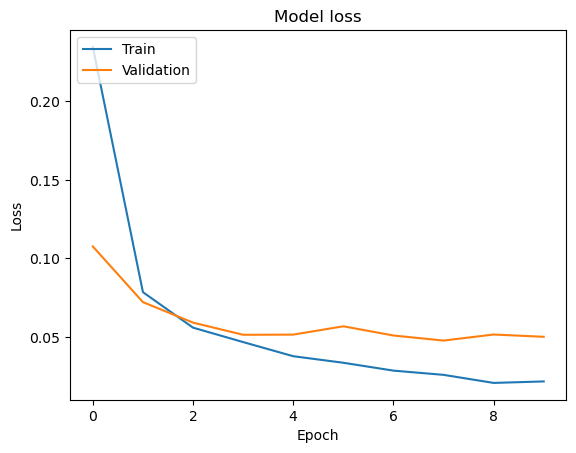

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [44]:
y_pred = np.argmax(model.predict(seq_val_x), axis=1)

375/375 [==============================] - 12s 29ms/step


In [46]:
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9']
print(classification_report(np.argmax(seq_val_y, axis=1), y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      0.99      0.99      1175
     class 1       0.99      0.99      0.99      1322
     class 2       0.99      0.99      0.99      1174
     class 3       0.99      0.99      0.99      1219
     class 4       0.98      0.99      0.98      1176
     class 5       0.98      0.99      0.98      1104
     class 6       0.99      0.99      0.99      1177
     class 7       0.99      0.98      0.99      1299
     class 8       0.99      0.98      0.98      1160
     class 9       0.98      0.97      0.98      1194

    accuracy                           0.99     12000
   macro avg       0.99      0.99      0.99     12000
weighted avg       0.99      0.99      0.99     12000



In [47]:
model.save('models/sequential_model.h5')

# Permuted

In [153]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Reshape(target_shape=(28, 28), input_shape=(784,)),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units=256, return_sequences=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units=128, return_sequences=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

In [154]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [155]:
history2 = model2.fit(perm_train_x, perm_train_y, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
1200/1200 [==============================] - 949s 788ms/step - loss: 0.4286 - accuracy: 0.8672 - val_loss: 0.1965 - val_accuracy: 0.9411
Epoch 2/10
1200/1200 [==============================] - 898s 749ms/step - loss: 0.2236 - accuracy: 0.9334 - val_loss: 0.1589 - val_accuracy: 0.9522
Epoch 3/10
1200/1200 [==============================] - 973s 811ms/step - loss: 0.1713 - accuracy: 0.9480 - val_loss: 0.1702 - val_accuracy: 0.9543
Epoch 4/10
1200/1200 [==============================] - 955s 795ms/step - loss: 0.1454 - accuracy: 0.9563 - val_loss: 0.1446 - val_accuracy: 0.9580
Epoch 5/10
1200/1200 [==============================] - 944s 787ms/step - loss: 0.1226 - accuracy: 0.9624 - val_loss: 0.1396 - val_accuracy: 0.9601
Epoch 6/10
1200/1200 [==============================] - 918s 765ms/step - loss: 0.1058 - accuracy: 0.9673 - val_loss: 0.1482 - val_accuracy: 0.9606
Epoch 7/10
1200/1200 [==============================] - 955s 796ms/step - loss: 0.0986 - accuracy: 0.9693 - val_

In [156]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [157]:
y_pred = np.argmax(model2.predict(perm_val_x), axis=1)

375/375 [==============================] - 48s 126ms/step


In [158]:
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9']
print(classification_report(np.argmax(seq_val_y, axis=1), y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.99      0.97      0.98      1175
     class 1       0.98      0.99      0.98      1322
     class 2       0.96      0.97      0.96      1174
     class 3       0.96      0.96      0.96      1219
     class 4       0.96      0.97      0.97      1176
     class 5       0.95      0.96      0.96      1104
     class 6       0.97      0.98      0.97      1177
     class 7       0.97      0.97      0.97      1299
     class 8       0.96      0.96      0.96      1160
     class 9       0.97      0.96      0.96      1194

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



In [159]:
model2.save('models/permuted_model2.h5')

# EVALUATION

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
test_dataset = pickle.load(open("/path/to/test/dataset", "rb"))
test_images, test_labels = test_dataset["test"]["images"], test_dataset["test"]["labels"]
# test_dataset = tf.keras.preprocessing.image_dataset_from_directory('/path/to/test/dataset', batch_size=32, image_size=(28, 28))

model = tf.keras.models.load_model('models/sequential_model.h5')

y_pred_labels = np.argmax(model.predict(test_images), axis=1)

target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9']
print(classification_report(np.argmax(y_pred_labels, axis=1), test_labels, target_names=target_names))